# A História

Tudo inicia-se em 1943, um mundo marcado pela segunda guerra mundial, nessa época a tecnologia militar avançava de forma intensa. Nessa época Frank Sinatra já era um astro em plena ascenção.stúdios como Disney e Warner Bros. criaram desenhos animados que eram usados como propaganda, promovendo o patriotismo e, muitas vezes, caricaturando os líderes do Eixo (Alemanha, Itália e Japão).
Em 1943, Warren Mcculloch, neurocientista teve uma brilhante idéia. E se nós seres humanos podesse simular o nosso cérebro?
Enquanto isso na mesma época, Walter Pitts questionou:

- Que tal utilizarmos portas lógicas, para simular o cérebro humano.

Essa parceria deu certo e eles se inspiraram no funcionamento do nosso cérebro:

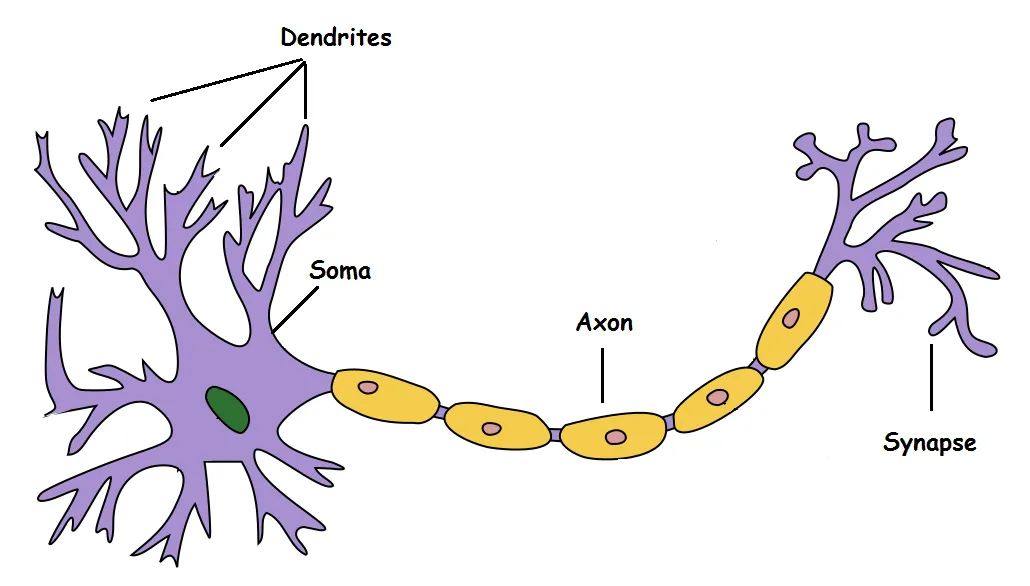

1.   **Dendritos:** recebem os sinais de outros neurônios. Dos bilhões de neurônios eles tem receptores que recebem sinais de outros neurônios.
2.   **Corpo:** processa os sinais
3.   **Axônio:** transmite o sinal para outros neurônios. Sua ativação depende da força do sinal.

Eles se insipiram, nesses neurônios que formam uma rede. Esse rede ele pode assumir diferentes padrões de ativação. Quando você ouve uma música boa, um conjunto de neurônios vai ativar (padrão). Quando você arranhar um prato, vai ativar outro conjunto de neurônios. A depender do estímulo (as entradas).

Insipirado pelo modelo do nosso cérebro, a dupla criou a primeira representação artificial do neurônio (modelo McCulloch-Pitts):


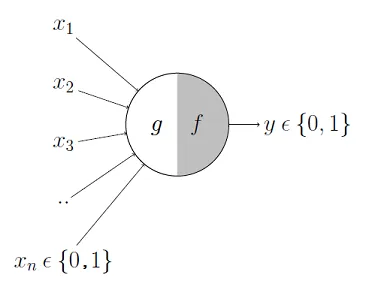


1.   Dendrito: recebe as entradas x1,x2..., xn
2.   Corpo: Função **g** agrega as entradas
3.   Axônio: função f decide a ativação do neurônio de acordo com a saída de g.






# O que aprendemos nesse notebook?

1. **Primeiro Modelo Neural**: Warren McCulloch, neurocientista, e Walter Pitts, lógico, propuseram um modelo computacional inspirado no funcionamento do cérebro humano.

2. **Estrutura dos Neurônios Biológicos**:
   - **Dendritos**: Recebem sinais de outros neurônios.
   - **Corpo celular**: Processa os sinais recebidos.
   - **Axônio**: Transmite o sinal para os próximos neurônios, ativando-se ou não, dependendo do estímulo recebido.

3. **Padrões de Ativação em Redes de Neurônios**: Diferentes estímulos geram padrões distintos de ativação entre os neurônios.

4. **Analogias com Redes Neurais Artificiais**: Redes neurais artificiais também aprendem padrões de ativação com base nos estímulos de entrada.

5. **Componentes do Modelo Neural Inicial**:
   - **Dendritos** (Entradas): Recebiam entradas binárias (0 ou 1).
   - **Corpo**: Somava as entradas recebidas.
   - **Axônio** (Função de Ativação): Decidia se ativava, conforme um limiar.

6. **Ativação Binária**: A saída do modelo era binária, com ativação ocorrendo quando a soma das entradas excedia o limiar.

7. **Funções Lógicas**: O modelo permitia realizar operações lógicas simples:
   - **Porta AND**: Ativa quando a soma é maior ou igual a 2.
   - **Porta OR**: Ativa quando a soma é maior ou igual a 1

Acurácia: 0.80


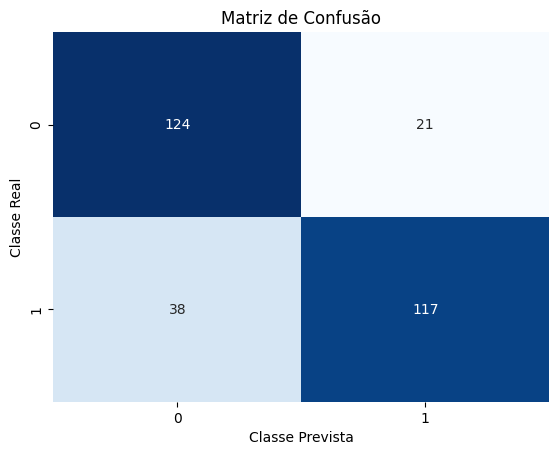

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       145
           1       0.85      0.75      0.80       155

    accuracy                           0.80       300
   macro avg       0.81      0.81      0.80       300
weighted avg       0.81      0.80      0.80       300



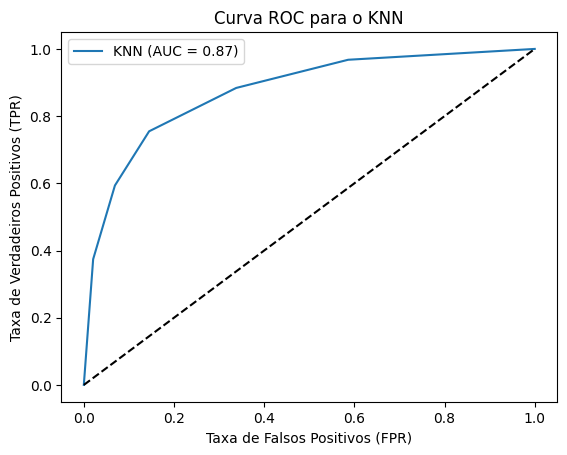

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gerar um conjunto de dados simulado
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 2. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 4. Fazer previsões
y_pred = knn.predict(X_test)

# 5. Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

# 6. Imprimir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# 7. Imprimir o classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 8. Calcular e plotar a curva ROC
y_scores = knn.predict_proba(X_test)[:, 1]  # Obter as probabilidades da classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

# Plotar a curva ROC
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência diagonal
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC para o KNN')
plt.legend(loc='best')
plt.show()
